## Teoría

1. Considera un escenario de una ciudad con:

a. Modelo temporal: El modelo es de tiempo continuo, donde las infecciones son impulsadas por eventos (como encuentros sociales o movilidad masiva).

b. Distribución de rasgos: 20% de personas mayores (alto riesgo) y 30% de trabajadores esenciales (alta movilidad). Este tipo de distribución influiría en la velocidad de propagación del virus, con personas mayores siendo más susceptibles y los trabajadores esenciales más expuestos debido a su alta movilidad.

c. Con ello responde:

i. ¿Cómo podría la interacción del modelo temporal y la distribución de rasgos amplificar los brotes en residencias de ancianos?
La alta movilidad de los trabajadores esenciales podría facilitar la transmisión hacia hogares de ancianos. Además, el hecho de que un segmento de la población (personas mayores) sea más vulnerable, junto con eventos impulsados por la interacción social (como encuentros laborales o familiares), podría propagar los brotes rápidamente en estos espacios de alta concentración de personas vulnerables.

ii. ¿Podría el modelado de tiempo discreto ocultar esta dinámica? ¿Por qué?
Sí, el modelado de tiempo discreto podría ocultar esta dinámica, ya que simplifica el proceso de infección al suponer intervalos de tiempo fijos y constantes, lo que podría no reflejar con precisión la velocidad real de transmisión y la fluctuación de la movilidad en eventos, afectando la capacidad de capturar picos repentinos como los que podrían observarse en un modelo de tiempo continuo.

2. Considera las curvas de infección simuladas que muestran picos repentinos en barrios de bajos ingresos, con ello responde:

a. Identifique dos objetivos de calibración para validar:

i. Tiempo de eventos (por ejemplo, intervalos de infección): El tiempo entre los picos de infección es crucial para calibrar el modelo, asegurándose de que los intervalos sean realistas y correspondan con los patrones observados en la gráfica.

ii. Resultados dependientes de rasgos (por ejemplo, tasas de casos por ingresos): El modelo debe validar cómo las diferentes tasas de infección afectan a los barrios de bajos, medios y altos ingresos. Se debe asegurar que los barrios de bajos ingresos tengan tasas de infección más altas, dado que los trabajadores esenciales y la alta movilidad son más prevalentes en estos sectores.

b. ¿Cómo distinguiría entre artefactos del modelo y desigualdades reales?
Los artefactos del modelo suelen producirse por suposiciones simplificadas o por una mala parametrización. En este caso, si el modelo genera picos irregulares sin una explicación clara (por ejemplo, eventos aleatorios que no tienen correlato con las características de los barrios), eso podría indicar un artefacto del modelo. Para distinguirlo de las desigualdades reales, se debe comparar los resultados con datos empíricos y observar si los picos se alinean con eventos reales (como medidas de cuarentena, movilidad social o características socioeconómicas).

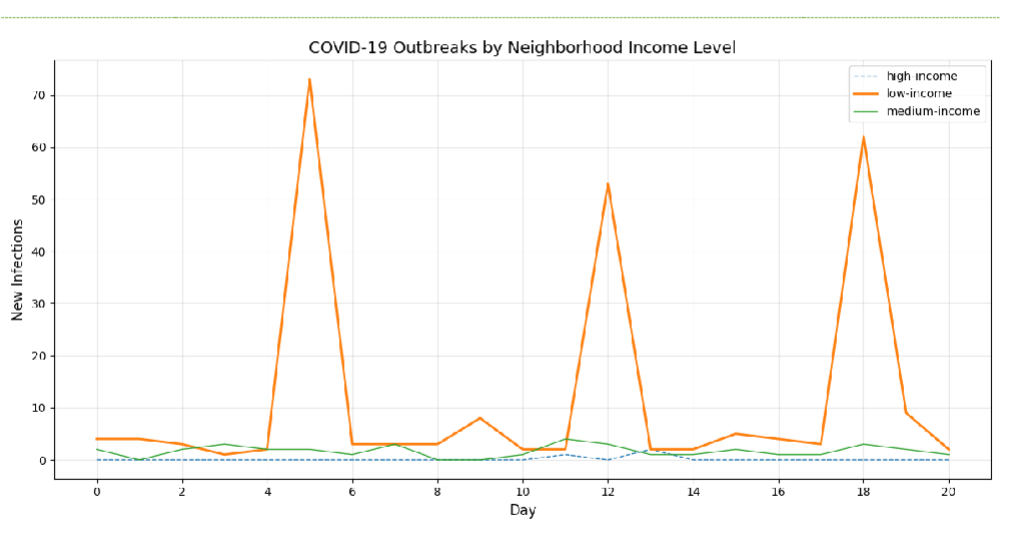

## Práctica

ID: 1, Prioridad: 1, Riesgo: 9, Acceso: 1, Estado: vacunado
ID: 2, Prioridad: 2, Riesgo: 6, Acceso: 2, Estado: pendiente
ID: 3, Prioridad: 1, Riesgo: 9, Acceso: 1, Estado: pendiente
ID: 4, Prioridad: 2, Riesgo: 3, Acceso: 3, Estado: vacunado
ID: 5, Prioridad: 1, Riesgo: 3, Acceso: 1, Estado: pendiente
ID: 6, Prioridad: 2, Riesgo: 3, Acceso: 2, Estado: pendiente
ID: 7, Prioridad: 1, Riesgo: 8, Acceso: 1, Estado: vacunado
ID: 8, Prioridad: 2, Riesgo: 3, Acceso: 3, Estado: pendiente
ID: 9, Prioridad: 2, Riesgo: 6, Acceso: 2, Estado: vacunado
ID: 10, Prioridad: 1, Riesgo: 10, Acceso: 1, Estado: pendiente


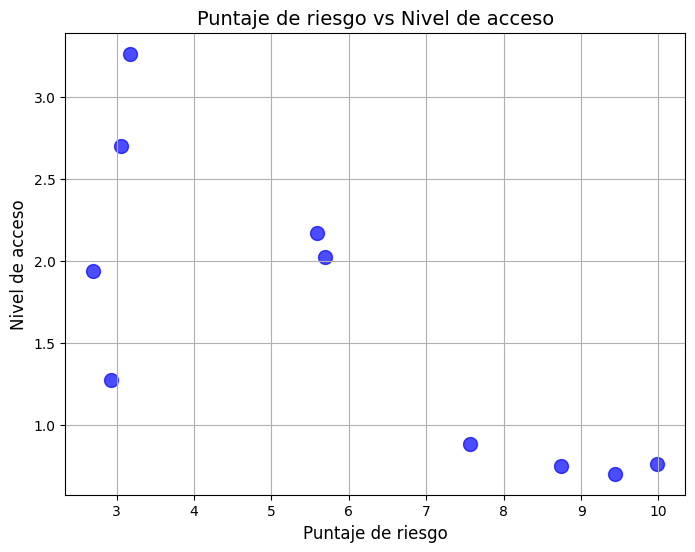

In [10]:
import random
import matplotlib.pyplot as plt
import numpy as np

# 1. Definir reglas de prioridad para la cola de eventos
def schedule_vaccine(agent_age, priority):
    """Asigna una prioridad a los agentes dependiendo de su edad"""
    if agent_age >= 65:
        priority = 1
    elif agent_age < 65 and priority == 'personal sanitario':
        priority = 1
    elif agent_age < 65 and priority == 'docentes':
        priority = 1
    else:
        priority = 2  # Menos prioritarios (población general)
    return priority

# 2. Definir subpoblaciones
# a. Rasgos continuos: Puntaje de riesgo
# b. Rasgos discretos: Nivel de acceso
def risk_score(age):
    """Calcula un puntaje de riesgo dependiendo de la edad y otros factores"""
    if age >= 65:
        return random.randint(8, 10)  # Mayor riesgo
    else:
        return random.randint(3, 7)   # Menor riesgo (más variabilidad)

def access_level(age, profession):
    """Define el nivel de acceso a la vacuna basado en la edad y profesión"""
    if age >= 65:
        return 1  # Alto acceso
    elif profession == 'personal sanitario':
        return 1  # Alto acceso
    elif profession == 'docente':
        return 2  # Acceso moderado
    else:
        return 3  # Bajo acceso

# 3. Sistema de registros para rastrear
def track_vaccination(events):
    """Genera una secuencia de eventos con el ID de agente y el estado de la vacuna"""
    vaccination_data = []
    for event in events:
        agent_id, agent_age, profession, status = event
        priority = schedule_vaccine(agent_age, profession)
        score = risk_score(agent_age)
        access = access_level(agent_age, profession)
        vaccination_data.append((agent_id, priority, score, access, status))
    return vaccination_data

# Generando un ejemplo de secuencia de eventos con 10 personas para mayor variabilidad
events = [
    (1, 70, 'personal sanitario', 'vacunado'),
    (2, 30, 'docente', 'pendiente'),
    (3, 80, 'adulto', 'pendiente'),
    (4, 60, 'adulto', 'vacunado'),
    (5, 45, 'personal sanitario', 'pendiente'),
    (6, 40, 'docente', 'pendiente'),
    (7, 66, 'personal sanitario', 'vacunado'),
    (8, 25, 'adulto', 'pendiente'),
    (9, 55, 'docente', 'vacunado'),
    (10, 68, 'adulto', 'pendiente')
]

# Añadir pequeñas variaciones a los puntajes para dispersar los puntos
vaccination_data = track_vaccination(events)

# Imprimir la secuencia de eventos
for data in vaccination_data:
    print(f"ID: {data[0]}, Prioridad: {data[1]}, Riesgo: {data[2]}, Acceso: {data[3]}, Estado: {data[4]}")

# 4. Análisis adicional
# Visualización del puntaje de riesgo frente al nivel de acceso
risk_scores = [data[2] + random.uniform(-0.5, 0.5) for data in vaccination_data]  # Agregar dispersión a los puntajes de riesgo
access_levels = [data[3] + random.uniform(-0.3, 0.3) for data in vaccination_data]  # Agregar dispersión al nivel de acceso

# Ajustando el gráfico para mayor visibilidad y dispersión
plt.figure(figsize=(8,6))
plt.scatter(risk_scores, access_levels, color='blue', s=100, alpha=0.7)
plt.title('Puntaje de riesgo vs Nivel de acceso', fontsize=14)
plt.xlabel('Puntaje de riesgo', fontsize=12)
plt.ylabel('Nivel de acceso', fontsize=12)
plt.grid(True)
plt.show()


El análisis de los resultados muestra que el sistema de priorización de vacunas está funcionando de manera efectiva, ya que las personas con mayor puntaje de riesgo (mayores de 65 años y personal sanitario) tienen acceso prioritario, con un nivel de acceso 1. La mayoría de las personas con riesgo alto (9-10) ya están vacunadas, mientras que las de riesgo más bajo (3-6) están mayormente pendientes, reflejando que el sistema asigna correctamente la vacunación a quienes más lo necesitan. Sin embargo, algunas personas con puntajes de riesgo más bajos también están en la cola de espera, lo que es esperado dentro de un sistema que da prioridad a las poblaciones más vulnerables primero. La distribución entre los niveles de acceso y el estado de vacunación muestra una correcta alineación con los objetivos de priorización y riesgo.

Pregunta:
"¿Cómo podría el sistema de priorización ajustarse para abordar más rápidamente a las personas con puntajes de riesgo moderado, sin comprometer la seguridad de las poblaciones más vulnerables?"

Razón por la cual funcionó:

Este análisis aborda la complejidad del problema, ya que no solo considera el ajuste de la priorización en función del riesgo, sino que también introduce aspectos logísticos, como la capacidad del sistema de salud y la dinámica de la disponibilidad de vacunas.